In [ ]:
# Lens distortion testing and then undistorting
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html
# The second mtx in the undistort function can be used to change the centre and direction of the camera 
# if it is not mounted centrally
# roi can be used to select the good part of the image, but sometimes it returns 0

# cameraMatrix = [[fx 0 cx], [0 fy cy] [0 0 1]] where fx,fy is focal length and cx,cy is focal centre in pixels
# distCoeffs = [k1,k2,p1,p2,k3] where ks are radial distortion coeffs and ps are rotational distortion
# rvec and tvec are rotation and translation 3-vectors

# Should chessboard be 9,6 instead of 6,9?


In [ ]:
# Results:

# For Tim's Turnigy action camera 30fps 1920x1080
cameraMatrix = numpy.array([[1.06117209e+03, 0.00000000e+00, 9.55563666e+02],
                            [0.00000000e+00, 1.05291498e+03, 5.08414471e+02],
                            [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
distCoeffs = numpy.array([[-0.35064237,  0.14510884,  0.00270952, -0.00120811,  0.0691003 ]])

# For Tim's Turnigy action camera 60fps
mtx, dist = numpy.array([[690.39321933, 0, 634.37817589], [ 0, 702.14519838, 365.87529244], [ 0, 0, 1]]), numpy.array([[-0.32184539, 0.13264522, -0.00105117, 0.00286794, -0.02831195]])

# For Julian's S9 phone
mtx, dist = numpy.array([[1.83493191e+03, 0.00000000e+00, 9.71559848e+02], [0.00000000e+00, 1.88918446e+03, 5.07887225e+02], [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), numpy.array([[ 0.27965266, -1.79449969, -0.01245634, 0.00592566, 3.64338597]])
# (after undistortion applied)
mtx, dist = numpy.array([[1.78052142e+03, 0.00000000e+00, 9.59332429e+02], [0.00000000e+00, 1.87243955e+03, 6.19163722e+02], [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), numpy.array([[-0.01420634, 0.2012354 , 0.00146844, -0.00239301, -0.6048644 ]])

# For Julian's Hero4 gopro
mtx, dist = numpy.array([[566.7163809, 0, 632.00137913], [ 0, 579.06244697, 485.92119094], [ 0, 0, 1]]), numpy.array([[-0.25674316, 0.08553107, -0.00286892, -0.00258803, -0.01426477]])
# (after undistortion applied)
mtx, dist = numpy.array([[583.01244776, 0, 631.10556735], [ 0, 588.32076401, 466.18157148], [ 0, 0, 1]]), numpy.array([[-0.02103092, 0.03318768, 0.00058936, 0.00011377, -0.01643113]])

# For Julian's Hero2 gopro not in its case
mtx, dist = numpy.array([[572.01802557, 0, 665.06249431], [ 0, 573.93668738, 367.45231427], [ 0, 0, 1]]), numpy.array([[-0.31193177, 0.13605342, 0.00348668, -0.00163797, -0.03588084]])

# For Julian's Hero2 gopro in its case
mtx, dist = numpy.array([[623.28986211, 0, 677.34961678], [ 0, 625.97496435, 383.90205928], [ 0, 0, 1]]), numpy.array([[-0.30269614, 0.12895977, 0.00115432, -0.00402918, -0.01630073]])


In [12]:
import cv2, numpy

vfile = "/home/julian/repositories/Future-Hangglider/CameraCalibrationTech/videos/turnigy30fps_chessboard3.MOV"

cap = cv2.VideoCapture(vfile)


In [13]:

nframes = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
w, h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
imageSize = (w, h)
print("nframes", nframes, "w,h =", imageSize)

chesspatternSize = (6, 9)
chesssquareLength = 0.02488  # 24.88mm  (changes rvec and tvec, but not the other coefficients)
chesspatternPoints = numpy.zeros((numpy.prod(chesspatternSize), 3), numpy.float32)
chesspatternPoints[:,:2] = numpy.indices(chesspatternSize).T.reshape(-1, 2)
chesspatternPoints *= chesssquareLength


nframes 696 w,h = (1920, 1080)


In [14]:

objectPoints = []
imagePoints = []
iframes = []

winSize, zeroZone, criteria = (5, 5), (-1, -1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)

for iframe in range(10, nframes, nframes//44):
    cap.set(cv2.CAP_PROP_POS_FRAMES, iframe)
    flag, frame = cap.retrieve()

    # try undistorting and then doing chessboards to see what undistorted distortion value comes as
    #mtx, dist = numpy.array([[690.39321933, 0, 634.37817589], [ 0, 702.14519838, 365.87529244], [ 0, 0, 1]]), numpy.array([[-0.32184539, 0.13264522, -0.00105117, 0.00286794, -0.02831195]])
    #frame = cv2.undistort(frame, mtx, dist, None, mtx)
    
    cv2.waitKey(10)  # necessary for the cv2.imshow() to work
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print("frame: ", iframe)
    found, corners = cv2.findChessboardCorners(img, chesspatternSize)
    if found:
        corners = cv2.cornerSubPix(img, corners, winSize, zeroZone, criteria)
        cv2.drawChessboardCorners(frame, chesspatternSize, corners, found) 
        
        #sml = cv2.resize(frame, (w//2,h//2))
        cv2.imshow('video', frame)
        iframes.append(iframe)
        imagePoints.append(corners.reshape(-1, 2))
        objectPoints.append(chesspatternPoints)

    else:
        print('chessboard not found')

cv2.destroyAllWindows()
len(imagePoints)


chessboard not found


45

In [15]:
# Long calculation that gets the rvec and tvec of the chessboard in each frame
retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objectPoints, imagePoints, imageSize, None, None)
cameraMatrix, distCoeffs


(array([[1.06473024e+03, 0.00000000e+00, 9.62416430e+02],
        [0.00000000e+00, 1.08931633e+03, 5.68986276e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-0.34281803,  0.17114964, -0.00216971,  0.0019551 , -0.04749971]]))

In [18]:
print("cameraMatrix = numpy.%s" % repr(cameraMatrix))
print("distCoeffs = numpy.%s" % repr(distCoeffs))


cameraMatrix = numpy.array([[1.06473024e+03, 0.00000000e+00, 9.62416430e+02],
       [0.00000000e+00, 1.08931633e+03, 5.68986276e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
distCoeffs = numpy.array([[-0.34281803,  0.17114964, -0.00216971,  0.0019551 , -0.04749971]])


In [9]:
cameraMatrix = numpy.array([[1.68893611e+03, 0.00000000e+00, 9.91122573e+02],
                            [0.00000000e+00, 1.68504840e+03, 5.10246843e+02],
                            [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
distCoeffs = numpy.array([[-0.45766936,  0.33866218,  0.01344557, -0.01417306, -0.30368472]])
imageSize = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

newcameraMatrix, validPixROI = cv2.getOptimalNewCameraMatrix(cameraMatrix, distCoeffs, imageSize, 0)

mapx, mapy = cv2.initUndistortRectifyMap(cameraMatrix, distCoeffs, None, newcameraMatrix, imageSize, 5)


[0, 9, 18, 27, 36]


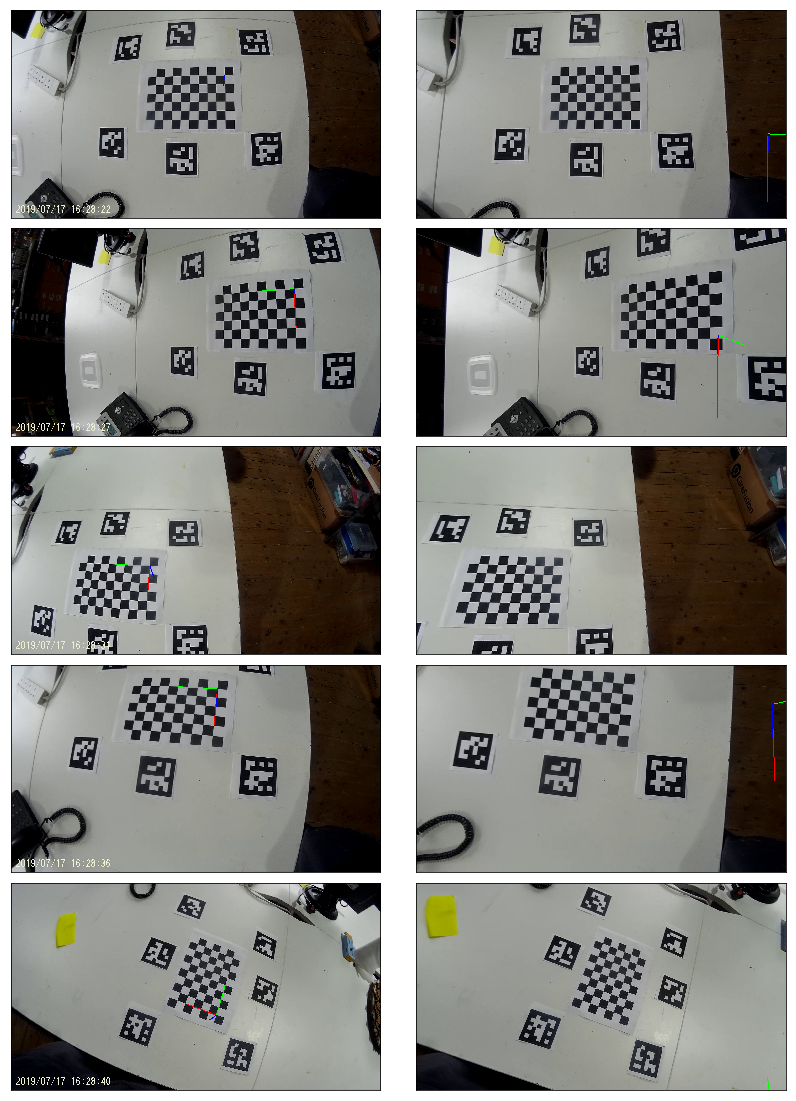

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

DcameraMatrix = numpy.array([[1.68893611e+03, 0.00000000e+00, 9.91122573e+02],
                            [0.00000000e+00, 1.68504840e+03, 5.10246843e+02],
                            [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
DdistCoeffs = numpy.array([[-0.45766936,  0.33866218,  0.01344557, -0.01417306, -0.30368472]])
imageSize = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

newcameraMatrix, validPixROI = cv2.getOptimalNewCameraMatrix(cameraMatrix, distCoeffs, imageSize, 0)
mapx, mapy = cv2.initUndistortRectifyMap(cameraMatrix, distCoeffs, None, newcameraMatrix, imageSize, 5)

plt.figure(figsize=(11,15))
iframeindexes = list(range(0, len(iframes), len(iframes)//5))[:5]

#framenumbers = [ list(range(10, nframes, nframes//5))
#for iframe in range(10, nframes, nframes//44):

print(iframeindexes)
for i in range(len(iframeindexes)):
    iframeindex = iframeindexes[i]
    iframe = iframes[iframeindex]
    rvec, tvec = rvecs[iframeindex], tvecs[iframeindex]
    
    cap.set(cv2.CAP_PROP_POS_FRAMES, iframe)
    flag, frame = cap.retrieve()
    
    # remap gives a better result on this
    frameUndistorted = cv2.undistort(frame, cameraMatrix, distCoeffs, newcameraMatrix)
    #frameUndistorted = cv2.remap(frame, mapx, mapy, cv2.INTER_LINEAR)
    
    plt.subplot(len(iframeindexes), 2, i*2+1)
    cv2.aruco.drawAxis(frame, cameraMatrix, distCoeffs, rvec, tvec, 0.1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)

    plt.subplot(len(iframeindexes), 2, i*2+2)
    cv2.aruco.drawAxis(frameUndistorted, newcameraMatrix, None, rvec, tvec, 0.1)
    plt.imshow(cv2.cvtColor(frameUndistorted, cv2.COLOR_BGR2RGB))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    
plt.subplots_adjust(0,0,1,1,0.05,0.05)
#plt.savefig("ch.jpg")

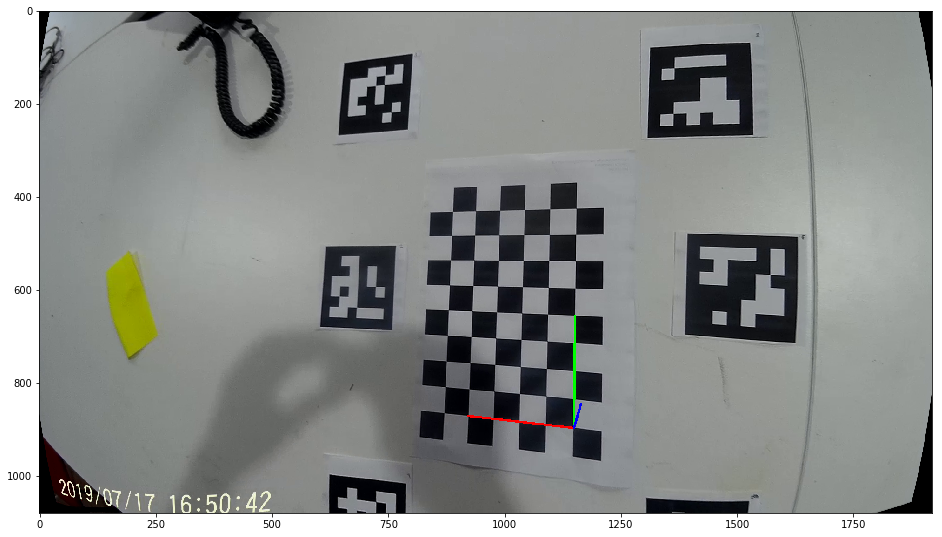

In [37]:
plt.figure(figsize=(16,16))
plt.imshow(cv2.cvtColor(frameUndistorted, cv2.COLOR_BGR2RGB))

array([[1],
       [2],
       [4],
       [6],
       [5]], dtype=int32)

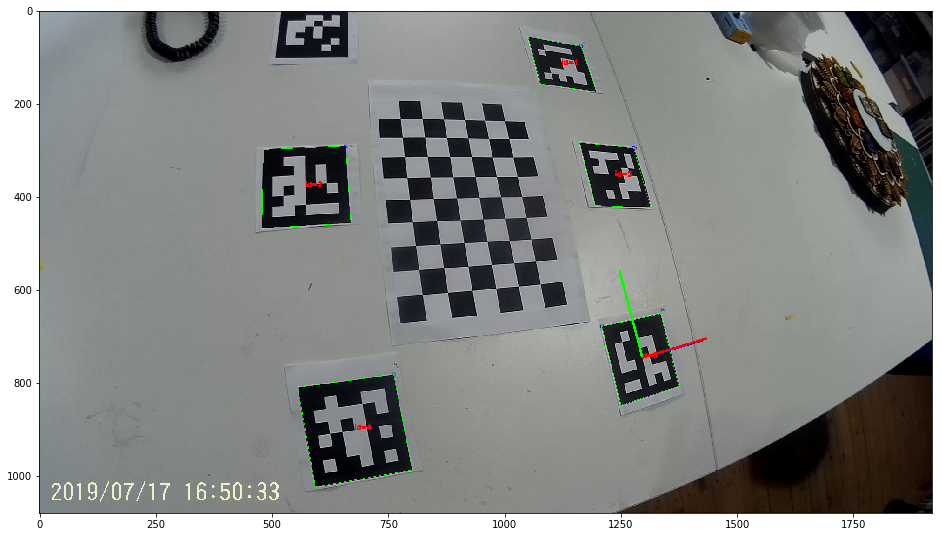

In [54]:
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
parameters =  cv2.aruco.DetectorParameters_create()
markerLength = 0.08610  # dimension in metres

iframe = 50
cap.set(cv2.CAP_PROP_POS_FRAMES, iframe)
flag, frame = cap.retrieve()

corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(frame, aruco_dict, parameters=parameters, cameraMatrix=cameraMatrix, distCoeff=distCoeffs)
crvecs, ctvecs, _objPoints = cv2.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)

cv2.aruco.es

bframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cv2.aruco.drawDetectedMarkers(bframe, corners, ids)

#for i in range(len(ids)):
for i in [3]:
    cv2.aruco.drawAxis(bframe, cameraMatrix, distCoeffs, crvecs[i], ctvecs[i], 0.1)

plt.figure(figsize=(16,16))
plt.imshow(bframe)
ids

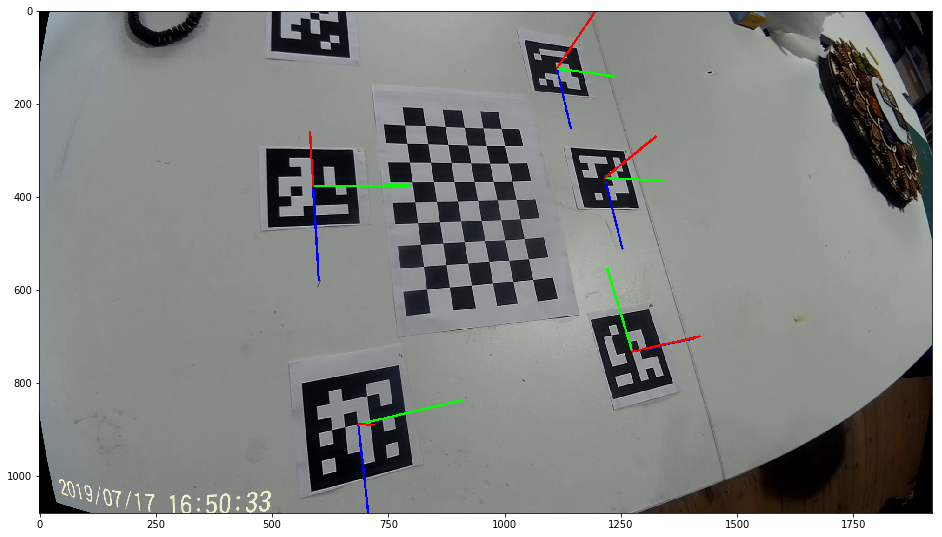

In [51]:
frameUndistorted = cv2.remap(frame, mapx, mapy, cv2.INTER_LINEAR)
bframeUndistorted = cv2.cvtColor(frameUndistorted, cv2.COLOR_BGR2RGB)

for i in range(len(ids)):
    cv2.aruco.drawAxis(bframeUndistorted, newcameraMatrix, None, crvecs[i], ctvecs[i], 0.1)

plt.figure(figsize=(16,16))
plt.imshow(bframeUndistorted)


In [48]:
ctvecs

array([[[-0.11913582, -0.1669436 ,  0.49174238]],

       [[-0.13201505,  0.04318427,  0.46893467]],

       [[ 0.21775752,  0.03416607,  0.37149522]],

       [[ 0.19731908, -0.1402707 ,  0.40049739]]])

In [44]:
markerLength = 0.08610  # dimension in metres
crvecs, ctvecs, _objPoints = cv2.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)
crvecs
ctvecs



array([[[-0.11913582, -0.1669436 ,  0.49174238]],

       [[-0.13201505,  0.04318427,  0.46893467]],

       [[ 0.21775752,  0.03416607,  0.37149522]],

       [[ 0.19731908, -0.1402707 ,  0.40049739]]])